In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print(x_train.shape)
print(x_test.shape)
print(y_train[50000])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 33s 3us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [3]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

C:\Users\majji\anaconda3\envs\handgestures_volumeControl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.8557 - loss: 0.4602 - val_accuracy: 0.9671 - val_loss: 0.1103
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9608 - loss: 0.1348 - val_accuracy: 0.9732 - val_loss: 0.0871
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9717 - loss: 0.0979 - val_accuracy: 0.9814 - val_loss: 0.0623
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9768 - loss: 0.0798 - val_accuracy: 0.9825 - val_loss: 0.0583
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9812 - loss: 0.0651 - val_accuracy: 0.9847 - val_loss: 0.0522
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9830 - loss: 0.0574 - val_accuracy: 0.9852 - val_loss: 0.0524
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9855 - loss: 0.0494 - val_accuracy: 0.9853 - val_loss: 0.0506
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9872 - loss: 0.0427 - 

In [6]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9855 - loss: 0.0535
Test accuracy: 0.9854999780654907


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


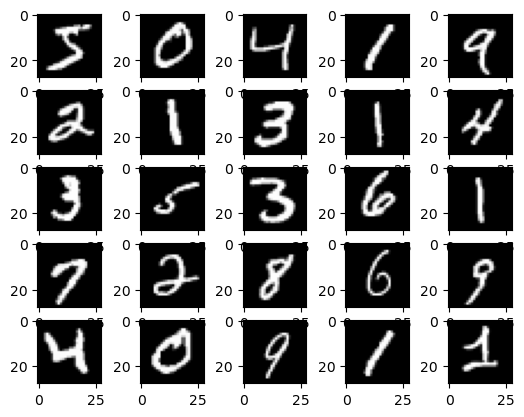

In [7]:
# example of loading and plotting the mnist dataset
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(25):
	# define subplot
	pyplot.subplot(5, 5, i+1)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [8]:
# example of a cnn for image classification
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
# load dataset
(x_train, y_train), (x_test, y_test) = load_data()
# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# determine the shape of the input images
in_shape = x_train.shape[1:]
# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)
# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)
# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
# make a prediction
image = x_train[0]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

(28, 28, 1) 10
Accuracy: 0.986
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Predicted: class=5


In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [10]:
# load and preprocess the CIFAR-10 dataset
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()

# Normalize pixel values to a range of [0,1]
train_images,test_images = train_images/255.0 , test_images/255.0

# One-Hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 240s 1us/step


In [11]:
len(test_images[2])

32

In [12]:
train_images.shape


(50000, 32, 32, 3)

In [13]:
test_images.shape


(10000, 32, 32, 3)

In [14]:
# create a deep learnig model
model = models.Sequential([
    # Step 4: Convolutional Layers
    layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3), activation = 'relu'),

    # Step 5: Flatten the output
    layers.Flatten(),

    # Step 6: Fully COnnected Layers
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10)
])

In [15]:
# compile the model
model.compile(optimizer='adam',
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [16]:
history = model.fit(train_images,train_labels, epochs = 10 , validation_data = (test_images,test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.4518 - loss: 1.5056 - val_accuracy: 0.5662 - val_loss: 1.2185
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5925 - loss: 1.1485 - val_accuracy: 0.6157 - val_loss: 1.0876
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6474 - loss: 1.0013 - val_accuracy: 0.6407 - val_loss: 1.0202
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6840 - loss: 0.9024 - val_accuracy: 0.6769 - val_loss: 0.9188
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.7080 - loss: 0.8307 - val_accuracy: 0.6793 - val_loss: 0.9360
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7325 - loss: 0.7687 - val_accuracy: 0.7002 - val_loss: 0.8700
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.7479 - loss: 0.7145 - val_accuracy: 0.6933 - val_loss: 0.9063
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7634 -

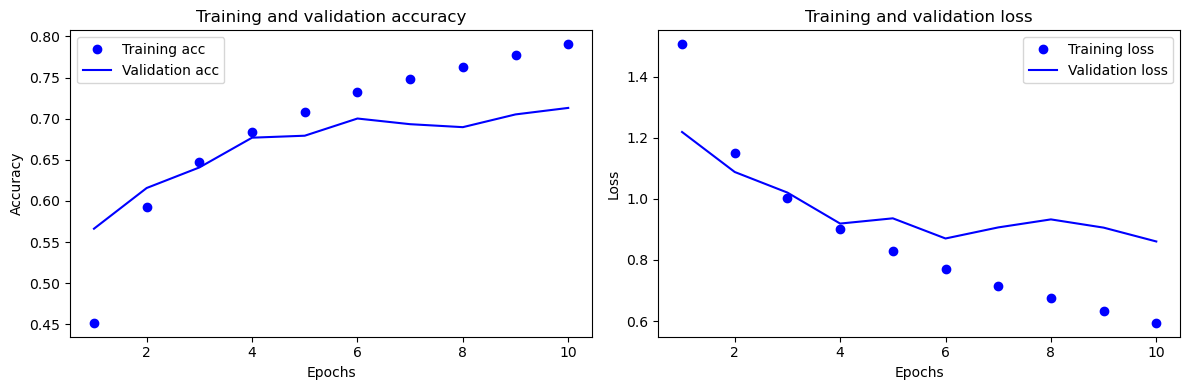

In [17]:
# Visualize training history
def plot_training_history(history):
    # Extract training history metrics
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create plots for accuracy and loss
    epochs = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss') 
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


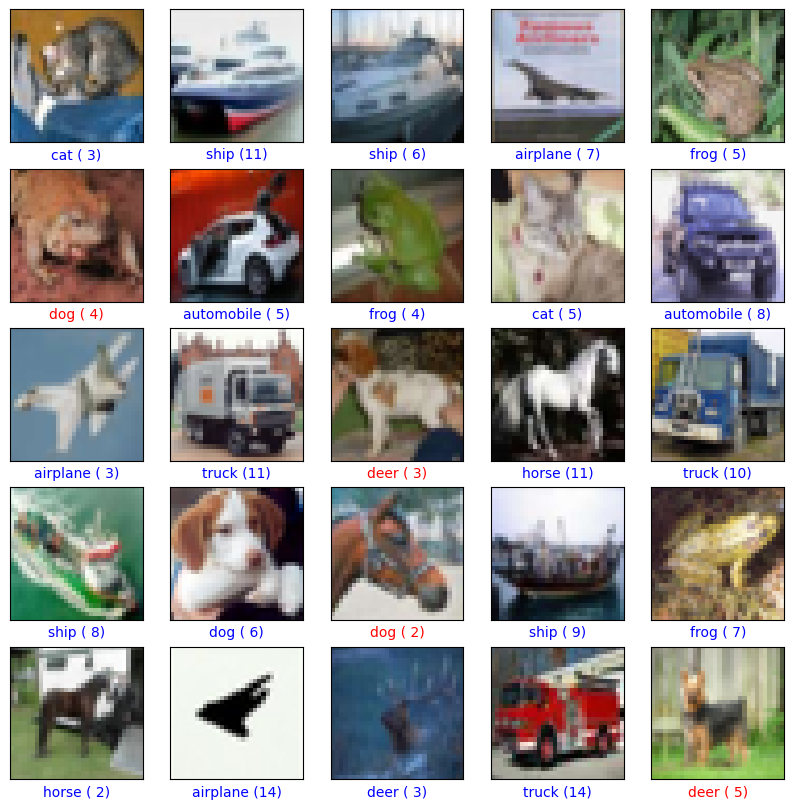

In [18]:
# Visualize example predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', \
               'frog', 'horse', 'ship', 'truck']
 
def plot_example_predictions():
    predictions = model.predict(test_images)
    num_rows, num_cols = 5, 5
    plt.figure(figsize=(10, 10))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.grid (False)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(test_images[i], cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = np.argmax(test_labels[i])
        if predicted_label == true_label:
            color = 'blue'
        else:
            color = 'red'
        plt.xlabel(f"{class_names[predicted_label]} ({np.max(predictions[i]):2.0f})", color=color)
 
# Call the function to plot example predictions
plot_example_predictions()